# GANS


I want to understand GANS so I can use to to data augmentation on tabular data or spot bad predictions.

**GOAL:** 
    
1. Understand GANS big picture 
1. How to initialze the DNNs
1. Why to use binary cross entropy loss
1. Simple explanation
1. Have tensorflow code

refs:

* https://debuggercafe.com/introduction-to-generative-adversarial-networks-gans/ <== looks good
    * https://debuggercafe.com/vanilla-gan-pytorch/ <== short version
* https://towardsdatascience.com/gans-generative-adversarial-networks-an-advanced-solution-for-data-generation-2ac9756a8a99
* https://towardsdatascience.com/fundamentals-of-generative-adversarial-networks-b7ca8c34f0bc#:~:text=What%20are%20GANs%2C%20and%20what,photos%20of%20more%20handwritten%20digits.
* https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29
* https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/
* https://arxiv.org/pdf/1406.2661.pdf <== paper
*  https://mafda.medium.com/gans-generative-adversarial-network-with-mnist-part-db8b9c061de0
* https://www.safwan.xyz/Vanilla-GAN/ <= with the algo in pseud code


In [1]:
!hostname 
!ls

MacBook-Pro.local
2018-06-08-lhof-running_gmm_em_code_from_mcdickenson.ipynb
2018-06-18-lhof-simulated_data.ipynb
2021-10-31-lhof-study_learning_rate_finder.ipynb
2023-02-10-lhof-study_GANS.ipynb
intro_KNN.ipynb
intro_batch_normalization.ipynb
intro_gradient_algos.ipynb
intro_kmeans.ipynb
intro_pca.ipynb
intro_plda.ipynb
intro_reinforcement_learning.ipynb
intro_to_prediction_interval.ipynb
machine_learning_metrics.ipynb
nohup.out


# Intro

A Generative Adversarial Network (GAN) is a deep learning technique used for generating new data similar to existing data. It consists of two neural networks:

1. Generator: The generator goal is to learn how to generate sysnthectic data. We say the generator learns the data distribution
1. Discriminator: The discriminator goals is to distinguish between real data and the synsthetic data


The NN are trained in a way that the Generator try to fools the Discriminator to label the data produced by the Generator as real (zero-sum game). The Discriminator tries to correctly label the Generator output as fake (synthetic data). At the begining of training both NN commit a lot of error since they are still learning. But up to certain point, the quality of the output of the Generator increase and also the Discriminator becomes better and hard to be fooled.

GANs has many applications in the industry:
1. Image, Video and audio generations: application on social media, advertisemenst and entertainment industry. Widely used i social media
1. Data augmentation: Help training other MAchine learnings models. Many task that utilizes GANs for increase the the data size of the minority classes acheive SOTA performance. Ex:
    * CIFAR-10: paper "Improved Training of Wasserstein GANs," Arjovsky et al. (2017) and "BigGAN: Large Scale GAN Training for High Fidelity Natural Image Synthesis," Brock et al. (2018) 
    * Medical imaging: "Adversarial deep structured nets for mass segmentation from mammograms" by Li et al. (2019), Synthesizing medical images for augmented reality training data using generative adversarial networks" by Yang et al. (2018)  and "Improving medical image segmentation via adversarial training and perceptual similarity metrics" by Zhang et al. (2018)
1. Anomaly detection: Achieve SOTA performance 
    * Credit Card Fraud Detection
    * paper "Generating Synthetic Tabular Data using Generative Adversarial Networks," Wang et al. (2019) 



In the figure below is an example of GANS archictectur for generating handwritten digits using the public mnist digit database 

* It is reccomended that the input noisy size matches images sizes
    * Smaller: the generator may not have enough information to create a high-quality image
    * Larger: he generator may have too much information, leading to overfitting and producing similar images repeatedly
    

* Generator and Discrminator DNN size
    * relative size and complexity of the generator and discriminator can affect the performance and stability of the GAN.
    * discriminator is much larger and more complex than the generator, it may be able to easily identify and reject the generated samples. This result in the generator failing to learn and producing low-quality samples
    * if the generator is much larger and more complex than the discriminator, it may be able to generate realistic-looking samples that can fool the discriminator, but at the cost of requiring more training time and computational resources.


<img src="../images/gans.png" alt="GANS">

During training, GANs alternate between updating the discriminator to better distinguish real from generated images, and updating the generator to produce more realistic images that fool the discriminator.
The discriminator and generators have different losses (Because they are performing different tasks). The classifier nature of the discriminator impose loss related to binary classification or multiclass classifications while the generator  has a special loss that takes the discriminator predictions into account. Usually, discriminator loss decreases rapidly compared to the generator and then generator catch ups. The discriminator loss increases (not mandatory) at the end keep stable.

* GANS loss:

$
L_{GAN}(G,D) = E_{x \sim p_{data}(x)}[\log D(x)] + E_{z \sim p_z(z)}[\log(1-D(G(z))]
$


where:
* $G$ is the generator and $D$ is the discriminator
* $G(z)$ is the generator output (fake image)
* $x$ is real data (real image) drawn from the true data distribution $p_{data}$ ($x \sim p_{data}$)
* $z$ is random noise data drawn from a **prior** distribution $p_z$ ($z \sim p_z$)
* $E$ is the expectation operaor ("The mean")

Bellow is a discussion of the equation above. It is the **GANS loss big picture equation**:

$
L(G, D) = E_x[log(D(x))] + E_z[log(1 - D(G(z)))]
$

where:
* $G$ is the generator and $D$ is the discriminator 
* $x$ is the true images 
* $z$ is noise data for generating fake images
* $E$ is the expectation operator ("The mean")

The first term $ E_x[log(D(x))]$ is related to the probability of the discriminator (log-likelihood of the discriminator) detect an image is true given the image is real. Training find the parameters of the discriminator that maximize that term. The discriminator is encouraged to maximize the probablity of detected real images. 

The second term is related to the ability of the generator to foo the discriminator (log-likelihood of the discriminator incorrectly classifying a fake image as true). **Maximize** that ability of the generator ecncourage the generator creates more realistic images to foo the discriminator. This is the same of **minimize** the probability of be detected by the discriminator (the probability that the discriminator correctly classifies generated samples as fake).


The choice of prior distribution can have a significant impact on the quality and diversity of the generated samples. Using a non-uniform prior distribution, such as a normal distribution ($z \sim N(0,1)$), is that it can help the generator to focus on specific regions of the data distribution where the most important features are located. For example, if the data distribution has a specific shape or structure, the prior distribution can be designed to reflect this structure and guide the generator to generate more realistic samples.Most common common priori distribution is the uniform $z \sim U(0,1)$, but different authors use: Normal, Bernouli, Multivariate Normal Distribution and Laplacian Distribution. 




# Load requirements

In [2]:
import IPython
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Image

InteractiveShell.ast_node_interactivity = "all"
print("agor vai")

# import nbformat
# from nbformat import v4

agor vai


In [3]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

2023-03-02 16:34:59.346498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


```sh
pip install nbformat
```

In [4]:
# # save the current notebook
# nb = v4.new_notebook()
# nbformat.write(nb, open('2023-02-10-lhof-study_GANS-v1.ipynb', 'w'), version=4)

# Load data

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_train = np.expand_dims(x_train, axis=-1)

# summarize the shape of the dataset
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
Train (60000, 28, 28, 1) (60000,)
Test (10000, 28, 28) (10000,)


8

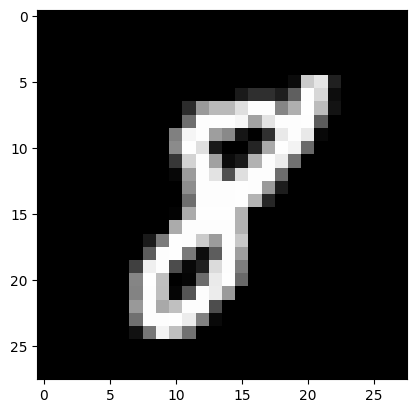

In [6]:

# plot raw pixel data
#pyplot.imshow(trainX[i], cmap='gray')
k = 17
y_train[k]
plt.imshow(x_train[k], cmap='gray')

# Discriminator

In [8]:
def discriminator_model(in_shape=(28,28,1)):

    model =  tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    # compile model
    opt =  tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

discriminator = discriminator_model()

discriminator.summary()
#plot_model(discriminator, show_shapes=True, show_layer_names=True)


2023-03-02 16:36:23.792137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

# Generator 

In [9]:
def generator_model(latent_dim = 100):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, input_shape=(latent_dim,)),
        tf.keras.layers.BatchNormalization(momentum=0.8),
        tf.keras.layers.LeakyReLU(0.2),
        tf.keras.layers.Dense(256),
        tf.keras.layers.BatchNormalization(momentum=0.8),
        tf.keras.layers.LeakyReLU(0.2),
        tf.keras.layers.Dense(28 * 28 * 1, activation='tanh'),
        tf.keras.layers.Reshape((28, 28, 1))
    ])

    return model

latent_dim = 28*28
generator = generator_model(latent_dim)

# Compiling the generator
generator.compile(loss='binary_crossentropy', optimizer='adam')

generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)              

# GANS

In [10]:
discriminator.trainable = False

gans = tf.keras.Sequential([generator,discriminator])

opt =  tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
gans.compile(optimizer=opt, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [11]:
gans.layers

gans.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         336528    
                                                                 
 sequential (Sequential)     (None, 1)                 40705     
                                                                 
Total params: 377,233
Trainable params: 335,760
Non-trainable params: 41,473
_________________________________________________________________


# Training

In [12]:
batch_size = 1024*3

real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

smooth = 0.1

i = 0
# Train Discriminator weights
discriminator.trainable = True
        
# Real samples
X_batch = x_train[i*batch_size:(i+1)*batch_size]
d_loss_real = discriminator.train_on_batch(x=X_batch, y=real)
        
# Fake Samples
z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
X_fake = generator.predict_on_batch(z)
d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)
         
# Discriminator loss
d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
# Train Generator weights
discriminator.trainable = False
d_g_loss_batch = gans.train_on_batch(x=z, y=real)

print("Finish him")

Finish him


In [15]:
def train_gan(gan, discriminator, generator, x_train, epochs=30, batch_size=64, latent_dim=100):

    history = {'discriminator': {'loss': [], 'accuracy': []}, 'generator': {'loss': [], 'accuracy': []}}
    for epoch in range(epochs):
        
        for i in range(x_train.shape[0] // batch_size):

            # Select a random batch of images
            idxs  = np.random.randint(low=0,high=x_train.shape[0],size=batch_size)
            real_images = x_train[idxs]
            
            # Generate fake images
            noise = np.random.normal(0, 1,size=[batch_size, latent_dim])
            fake_images = generator.predict(noise,verbose=False)
            
            # Combine real and fake images
            x = np.concatenate([real_images, fake_images])
            
            # Labels for real and fake images
            y = np.ones(2 * batch_size)
            y[batch_size:] = 0
            
            # Train the discriminator
            discriminator.trainable = True
            d_loss = discriminator.train_on_batch(x, y)
            
            # Train the generator
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            y = np.ones(batch_size)
            discriminator.trainable = False
            g_loss = gan.train_on_batch(noise, y)

        if epoch % 50 == 0:
            samples = 3
            # Generate fake images to visualize progress
            noise = np.random.normal(0, 1, (samples, latent_dim))
            fake_images = generator.predict(noise,verbose=False)

            # Plot the fake images
            plt.figure(figsize=(10, 10))
            for i in range(samples):
                plt.subplot(1, samples, i + 1)
                plt.imshow(fake_images[i, :, :, 0], cmap='gray')
                plt.axis('off')
        
        # Save the losses and accuracies
        history['discriminator']['loss'].append(d_loss[0])
        history['discriminator']['accuracy'].append(d_loss[1])
        history['generator']['loss'].append(g_loss[0])
        history['generator']['accuracy'].append(g_loss[1])

        
        if epoch % 25 == 0:
            # Print the progress
            print("Epoch:", epoch + 1, 
                f"Generator Loss: {g_loss[0]:.4f}", f"Generator Accuracy: {g_loss[1]:.1%}", 
                f"Discriminator Loss: {d_loss[0]:.4f}", f"Discriminator Accuracy: {d_loss[1]:.1%}")

    return history


In [16]:
batch_size
x_train.shape
x_train.shape[0]//batch_size


3072

(60000, 28, 28, 1)

19

Epoch: 1 Generator Loss: 1.7354 Generator Accuracy: 0.0% Discriminator Loss: 0.3866 Discriminator Accuracy: 93.1%
CPU times: user 58min 5s, sys: 3min 38s, total: 1h 1min 43s
Wall time: 12min 17s


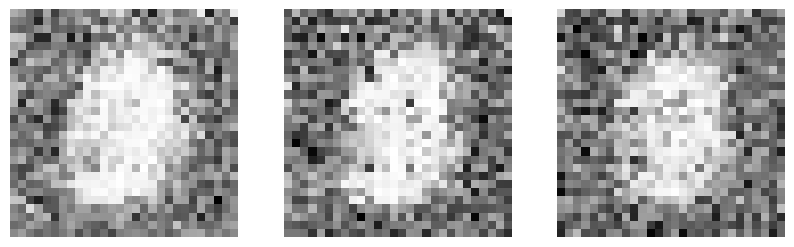

In [19]:
%%time
# Training the GAN
#train_gan(generator, discriminator, x_train)

# Tooke 12m for 25 epochs. (I need to run in cloud)
history = train_gan(gans, discriminator, generator, x_train, epochs=25, batch_size=batch_size, latent_dim=latent_dim)

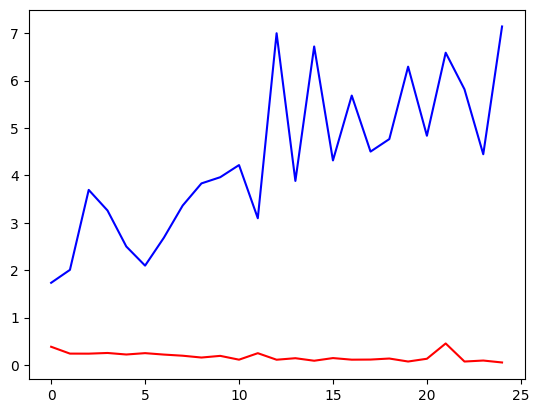

In [20]:
plt.plot(history['discriminator']['loss'], 'r')
plt.plot(history['generator']['loss'], 'b')

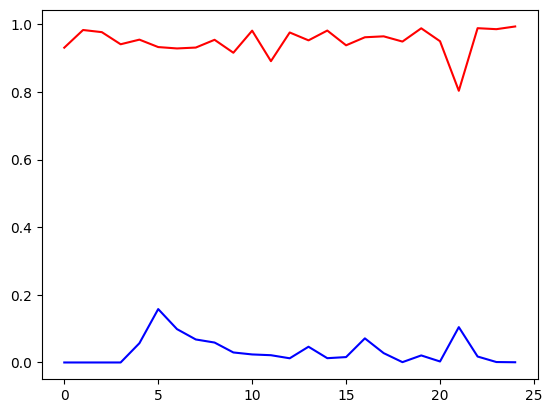

In [21]:
plt.plot(history['discriminator']['accuracy'], 'r')
plt.plot(history['generator']['accuracy'], 'b')

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

<AxesSubplot:>

(-0.5, 27.5, 27.5, -0.5)

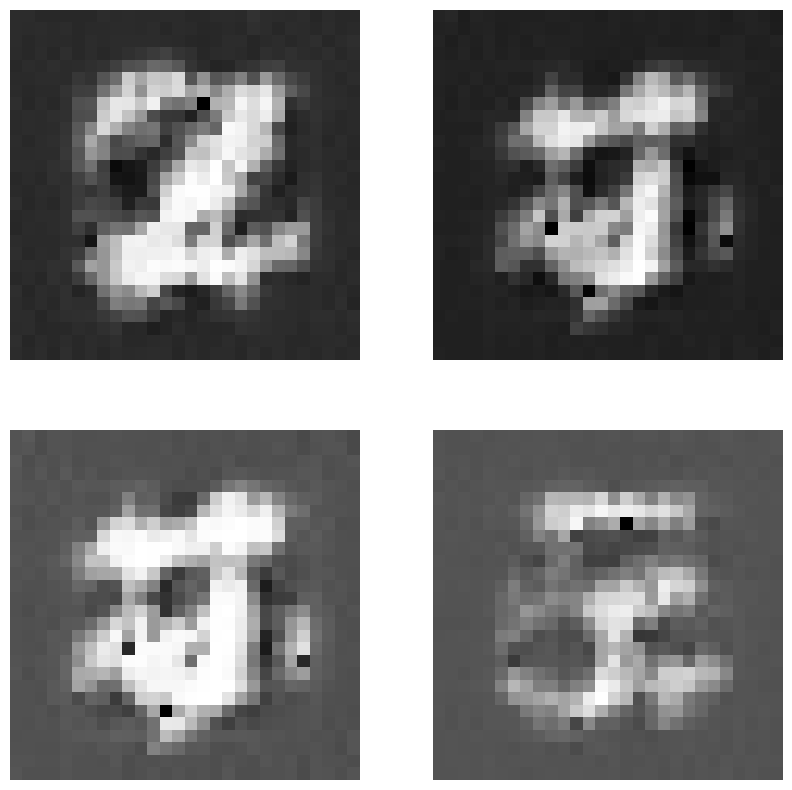

In [22]:
n_col = 2
n_row = 2
samples = n_col + n_row
# Generate fake images to visualize progress
noise = np.random.normal(0, 1, (samples, latent_dim))
fake_images = generator.predict(noise,verbose=False)

# Plot the fake images
plt.figure(figsize=(10, 10))
for i in range(samples):
    plt.subplot(n_row,n_col, i + 1)
    plt.imshow(fake_images[i, :, :, 0], cmap='gray')
    plt.axis('off')


# Change the archictecture to be able to select the digit

https://www.kaggle.com/code/zhoulingyan0228/generating-mnist-gan


**PAREI**
* PRECISO EMNTENDER A ARQUITETURA** 
    * alterar batchnormalization depois de activation
    * remover dropout com bacthnormalization (talvez se for usado em layers diferentes eh ok)

In [42]:
from tensorflow.keras.layers import Input, Embedding, concatenate, Dense, Reshape, Dropout, Flatten
from tensorflow.keras.layers import LeakyReLU, BatchNormalization, UpSampling2D, Conv2D,Activation

from tensorflow.keras.models import Model

In [43]:
def generator_model(latent_dim = 100):
    
         
    latent_input = Input(shape=(latent_dim,), name='latent_input')
    
    label_input = Input(shape=(1,), name='label_input') # 0...9
    x = Embedding(input_dim=10, output_dim=10)(label_input)
    x = Reshape((10,))(x)
    
    x = concatenate([x, latent_input], axis=-1)

    x = Dense(7*7*128)(x)
    x = LeakyReLU()(x)
    x = Reshape((7,7,128))(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, strides=1, padding='same')(x)
    x = LeakyReLU()(x)
    x = BatchNormalization()(x)
    x = UpSampling2D()(x)
    x = Conv2D(32, kernel_size=3, strides=1, padding='same')(x)
    x = LeakyReLU()(x)
    x = BatchNormalization()(x)
    x = Conv2D(1, kernel_size=3, strides=1, padding='same')(x)
    x = Activation('sigmoid')(x)
    x = Reshape((28,28,))(x)
    
    model = Model(inputs=[latent_input, label_input], outputs=x)

    return model

generator = generator_model()

# Compiling the generator
generator.compile(loss='binary_crossentropy', optimizer='adam')

generator.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 label_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 1, 10)        100         ['label_input[0][0]']            
                                                                                                  
 reshape_15 (Reshape)           (None, 10)           0           ['embedding_6[0][0]']            
                                                                                                  
 latent_input (InputLayer)      [(None, 100)]        0           []                               
                                                                                            

In [46]:
def discriminator_model(in_shape=(28,28,)):

    img_input = Input(shape=in_shape)
    x = Reshape((28,28,1))(img_input)
    
    x = Conv2D(16, kernel_size=3, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(32, kernel_size=3, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, kernel_size=3, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(128, kernel_size=3, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = BatchNormalization()(x)
    
    x = Flatten()(x)
    x = Dense(11, activation='softmax')(x)
    
    model = Model(inputs=img_input, outputs=x)
    
    return model

In [47]:
discriminator = discriminator_model()

discriminator.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape_19 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 14, 14, 16)        0         
                                                                 
 batch_normalization_26 (Bat  (None, 14, 14, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_34 (Conv2D)          (None, 7, 7, 32)          4640      
                                                           